In [ ]:
## Image recognition with Support Vector Machines
> We are going to use faces from sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [85]:
faces.data.shape

(400, 4096)

In [91]:
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [5]:
faces.images.shape

(400, 64, 64)

> We have 400 images of faces

In [6]:
faces.images[0].shape

(64, 64)

> Each image is `64x64` pixcels

### Visualising the first image

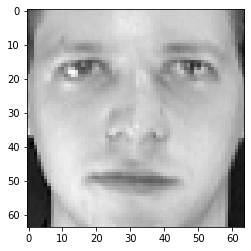

In [8]:
plt.imshow(faces.images[0], cmap="gray")

In [10]:
faces.target.shape

(400,)

In [ ]:
> We have 400 different people

#### Training a Support Vector Machine
> This is a classification problem

> To use SVM in scikit-learn to solve our task, we will import the SVC class from the
sklearn.svm module:


In [11]:
from sklearn.svm import SVC

In [40]:
model = SVC(kernel="linear")
model

SVC(kernel='linear')

### Splitting our data into trainning and testing

In [41]:
X = faces.data
y = faces.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 29)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 4096), (100, 4096), (300,), (100,))

### Classifying images

In [43]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
model.score(X_train, y_train)

1.0

> The **model** is `100%` accurate on the train dataset

In [45]:
model.score(X_test, y_test)

0.94

> The **model** is `94%` accurate on the test dataset

#### Making some predictions

In [46]:
X_train[0], y_train[0]

(array([0.4338843 , 0.5206612 , 0.5041322 , ..., 0.5082645 , 0.5041322 ,
        0.46694216], dtype=float32),
 33)

In [47]:
model.predict([X_train[0]])

array([33])

#### Making predictions on the test data

In [48]:
for x, y in list(zip(X_test, y_test))[10:30]:
    print(model.predict([x])[0], "----->", y)

34 -----> 34
36 -----> 36
39 -----> 39
26 -----> 26
31 -----> 31
3 -----> 3
18 -----> 18
8 -----> 8
16 -----> 16
29 -----> 29
39 -----> 39
35 -----> 35
29 -----> 4
8 -----> 8
24 -----> 24
6 -----> 6
2 -----> 2
37 -----> 37
32 -----> 32
22 -----> 25


#### Perfomance

In [53]:
from sklearn.metrics import accuracy_score, f1_score

In [51]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.94

In [65]:
y_pred = model.predict(X_train)
acc = accuracy_score(y_train, y_pred)
acc

1.0

##### f1_score

In [67]:

f1_score(y_train, y_pred, average=None)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

> The model if predicting Equaly on all faces

In [62]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [81]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=list(set(y_true)))

array([[0, 1, 0],
       [0, 2, 1],
       [0, 0, 2]], dtype=int64)

In [84]:
y_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_pred))

[[8 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 7]]


> Done